# CNN

### References:
1. https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

Using TensorFlow backend.


In [3]:
train_file = ".\\input\\train.csv"
test_file = ".\\input\\test.csv"
# output_file = ".\\output\\submission.csv"

In [4]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(raw_data[:,1:], raw_data[:,0], test_size=0.1)

Text(0.5,1,'28x28 data')

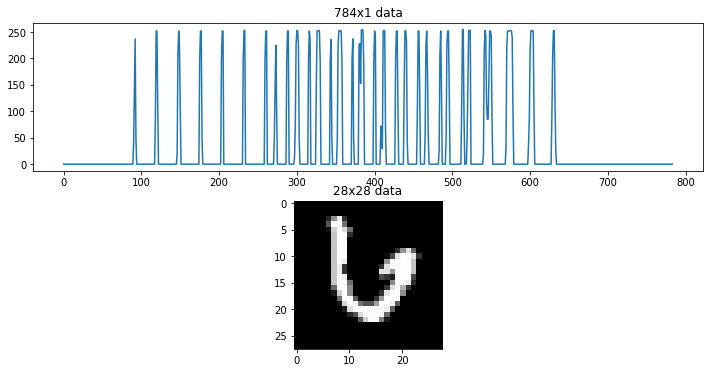

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [ ]:
print(x_train.shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_train[0].shape)
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

In [ ]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [ ]:
print(y_train[0])
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

In [ ]:
model = Sequential()
# Block 1
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding = 'Same',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.5))
# Block 2
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.5))
# Block 3
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.5))
# Block 4
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.5))
# Block 5
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(strides=(2,2)))
# model.add(Dropout(0.25))
# Output
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-4 * 0.9 ** x)

# log_dir = os.path.join(model_path, run_name)
# print('log_dir:' + log_dir)
# tensorBoard = TensorBoard(log_dir=log_dir)

In [ ]:
%%time
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=4, seed=2017),
                           steps_per_epoch=500,
                           epochs=30, #Increase this when not on Kaggle kernel
                           verbose=1,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), 
                           callbacks=[annealer])

In [ ]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

In [ ]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [ ]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

In [ ]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

## Predict

In [ ]:
import time
import os

project_name = 'Digit_Recognizer'
step_name = 'Predict'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
final_acc_str = str(int(final_acc*10000))
run_name = project_name + '_' + step_name + '_' + time_str + '_' + final_acc_str
print(run_name)
cwd = os.getcwd()
output_file = os.path.join(cwd, 'output', run_name + '.csv')
print(output_file)

In [ ]:
y_hat = model.predict(x_test, batch_size=64)

In [ ]:
y_pred = np.argmax(y_hat,axis=1)

In [ ]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

In [ ]:
print('Done!')